In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_excel('Automobile_data.xlsx', index_col=0)
df

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,Fuel_System,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
Sl. No.,,,,,,,,,,,,,,,,,,,,,
1,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,Skoda,Octavia,Onyx 1.8 Tsi Dsg,1798.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
784,Skoda,Octavia,Onyx 2.0 Tdi Dsg,1968.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
785,Mahindra,Verito,1.5 D2,1461.0,4.0,3.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Delete all the column which has null value over 40%

In [6]:
threadhold = 40

for col in df.columns:
    if (df[col].isna().sum() / len(df.index)) * 100 >= threadhold:
        df.drop(col, axis=1, inplace=True)
df

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,Fuel_System,...,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Multifunction_Steering_Wheel,Seat_Height_Adjustment
Sl. No.,,,,,,,,,,,,,,,,,,,,,
1,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,Skoda,Octavia,Onyx 1.8 Tsi Dsg,1798.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,...,Yes,Yes,Yes,6.0,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Multifunction Steering Wheel,Electric Adjustment with Memory
784,Skoda,Octavia,Onyx 2.0 Tdi Dsg,1968.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,...,Yes,Yes,Yes,6.0,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Multifunction Steering Wheel,Electric Adjustment with Memory
785,Mahindra,Verito,1.5 D2,1461.0,4.0,3.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manual Adjustment


# Delete the rows which fuel type is CNG, Electric, CNG+Petrol and Hybrid

In [7]:
df['Fuel_Type'].value_counts()
delete_type = ['CNG', 'Electric', 'CNG + Petrol', 'Hybrid']
df.drop(df.loc[df['Fuel_Type'].isin(delete_type)].index, axis=0, inplace=True)
df

,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,Fuel_System,...,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Number_of_Airbags,Adjustable_Steering_Column,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Multifunction_Steering_Wheel,Seat_Height_Adjustment
Sl. No.,,,,,,,,,,,,,,,,,,,,,
1,Tata,Nano Genx,Xt,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tata,Nano Genx,Xe,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Tata,Nano Genx,Xta,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Tata,Nano Genx,Xm,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Tata,Nano Genx,Xma,624.0,2.0,2.0,RWD (Rear Wheel Drive),In-line,"Rear, Transverse",Injection,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,Skoda,Octavia,Onyx 1.8 Tsi Dsg,1798.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,...,Yes,Yes,Yes,6.0,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Multifunction Steering Wheel,Electric Adjustment with Memory
784,Skoda,Octavia,Onyx 2.0 Tdi Dsg,1968.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,...,Yes,Yes,Yes,6.0,"Rake, Reach",Front and rear sensors with camera,Yes,Yes,Multifunction Steering Wheel,Electric Adjustment with Memory
785,Mahindra,Verito,1.5 D2,1461.0,4.0,3.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",Injection,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manual Adjustment


In [8]:
df.columns

Index(['Make', 'Model', 'Variant', 'Displacement', 'Cylinders',
       'Valves_Per_Cylinder', 'Drivetrain', 'Cylinder_Configuration',
       'Engine_Location', 'Fuel_System', 'Fuel_Tank_Capacity_litre',
       'Fuel_Type', 'Height_mm', 'Length_mm', 'Width_mm', 'Body_Type', 'Doors',
       'ARAI_Certified_Mileage', 'Kerb_Weight', 'Gears', 'Ground_Clearance',
       'Front_Brakes', 'Rear_Brakes', 'Front_Suspension', 'Rear_Suspension',
       'Front_Tyre_&_Rim', 'Rear_Tyre_&_Rim', 'Power_Steering',
       'Power_Windows', 'Keyless_Entry', 'Power', 'Torque', 'Odometer',
       'Speedometer', 'Tachometer', 'Tripmeter', 'Seating_Capacity',
       'Seats_Material', 'Type', 'Wheelbase', 'Wheels_Size',
       '12v_Power_Outlet', 'Audiosystem', 'Aux-in_Compatibility',
       'Average_Fuel_Consumption', 'Basic_Warranty', 'Bluetooth',
       'Boot-lid_Opener', 'Boot_Space_litre', 'CD_/_MP3_/_DVD_Player',
       'Central_Locking', 'Child_Safety_Locks', 'Clock', 'Cup_Holders',
       'Distance_to_Em

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 1 to 787
Data columns (total 84 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Make                                       751 non-null    object 
 1   Model                                      751 non-null    object 
 2   Variant                                    751 non-null    object 
 3   Displacement                               751 non-null    float64
 4   Cylinders                                  724 non-null    float64
 5   Valves_Per_Cylinder                        704 non-null    float64
 6   Drivetrain                                 750 non-null    object 
 7   Cylinder_Configuration                     749 non-null    object 
 8   Engine_Location                            722 non-null    object 
 9   Fuel_System                                751 non-null    object 
 10  Fuel_Tank_Capacity_litre  

There are 12 columns' dtype are float64, and 3 columns' dtype are int64, therefore, there are 15 columns are numerical type data.

In [10]:
df.describe()

,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Height_mm,Length_mm,Width_mm,Doors,Seating_Capacity,Boot_Space_litre,Minimum_Turning_Radius,Number_of_Airbags
count,751.000000,724.000000,704.000000,741.000000,751.000000,751.000000,751.000000,749.000000,748.000000,632.000000,568.000000,681.000000
mean,1530.011984,3.828729,3.889205,47.094332,1600.035952,4162.311585,1751.601864,4.686248,5.417112,360.324367,5.340845,3.027900
std,555.629475,0.719961,0.454718,11.926612,133.768417,396.559048,108.927082,0.521296,1.029590,137.369056,1.049113,2.082303
min,624.000000,2.000000,2.000000,24.000000,1304.000000,3164.000000,1410.000000,2.000000,2.000000,94.000000,4.000000,1.000000
25%,1197.000000,4.000000,4.000000,37.000000,1510.000000,3941.000000,1695.000000,4.000000,5.000000,256.000000,4.900000,2.000000
50%,1461.000000,4.000000,4.000000,45.000000,1560.000000,3995.000000,1735.000000,5.000000,5.000000,350.000000,5.200000,2.000000
75%,1598.000000,4.000000,4.000000,55.000000,1655.000000,4456.000000,1814.000000,5.000000,5.000000,460.000000,5.400000,3.000000
max,6592.000000,12.000000,4.000000,93.000000,2670.000000,5458.000000,2218.000000,5.000000,16.000000,981.000000,11.700000,10.000000


In [11]:
# get the column names of numberical data
numerical_data_columns_name = []
categorial_data_columns_name = []
for col in df.columns:
    if df[col].dtypes == 'float64' or df[col].dtypes == 'int64':
        numerical_data_columns_name.append(col)
    else:
        categorial_data_columns_name.append(col)

numerical_data_columns_name

['Displacement',
 'Cylinders',
 'Valves_Per_Cylinder',
 'Fuel_Tank_Capacity_litre',
 'Height_mm',
 'Length_mm',
 'Width_mm',
 'Doors',
 'Seating_Capacity',
 'Boot_Space_litre',
 'Minimum_Turning_Radius',
 'Number_of_Airbags']

In [12]:
num_df = df[numerical_data_columns_name]
for item in num_df.columns:
    
    index = num_df[item].isna().value_counts().index
    value = num_df[item].isna().value_counts().values
    if len(index) == 1:
        print(item, end='-------')
        if index[0] == False:
            print('0 missing data')
            
    else:
        print(item, end='-------')
        if index[0] == True:
            print(f'{value[0]} missing data')
        else:
            print(f'{value[1]} missing data')
        
# num_df['Displacement'].isna().value_counts().index

Displacement-------0 missing data
Cylinders-------27 missing data
Valves_Per_Cylinder-------47 missing data
Fuel_Tank_Capacity_litre-------10 missing data
Height_mm-------0 missing data
Length_mm-------0 missing data
Width_mm-------0 missing data
Doors-------2 missing data
Seating_Capacity-------3 missing data
Boot_Space_litre-------119 missing data
Minimum_Turning_Radius-------183 missing data
Number_of_Airbags-------70 missing data


In [13]:
for col in num_df.columns:
    print(col, end='-------')
    median = num_df[col].median()
    mode = num_df[col].mode()
    std = num_df[col].std()
    print(f"Median is {median}, mode is {mode[0]} and standard variance is {std}")


Displacement-------Median is 1461.0, mode is 1197.0 and standard variance is 555.6294747307109
Cylinders-------Median is 4.0, mode is 4.0 and standard variance is 0.7199608400861689
Valves_Per_Cylinder-------Median is 4.0, mode is 4.0 and standard variance is 0.45471757377480776
Fuel_Tank_Capacity_litre-------Median is 45.0, mode is 45.0 and standard variance is 11.926612089704548
Height_mm-------Median is 1560.0, mode is 1520 and standard variance is 133.7684169465737
Length_mm-------Median is 3995.0, mode is 3995 and standard variance is 396.55904829623915
Width_mm-------Median is 1735.0, mode is 1735 and standard variance is 108.92708238321711
Doors-------Median is 5.0, mode is 5.0 and standard variance is 0.5212956372901769
Seating_Capacity-------Median is 5.0, mode is 5.0 and standard variance is 1.0295896445187214
Boot_Space_litre-------Median is 350.0, mode is 350.0 and standard variance is 137.36905595968997
Minimum_Turning_Radius-------Median is 5.2, mode is 5.2 and standard v

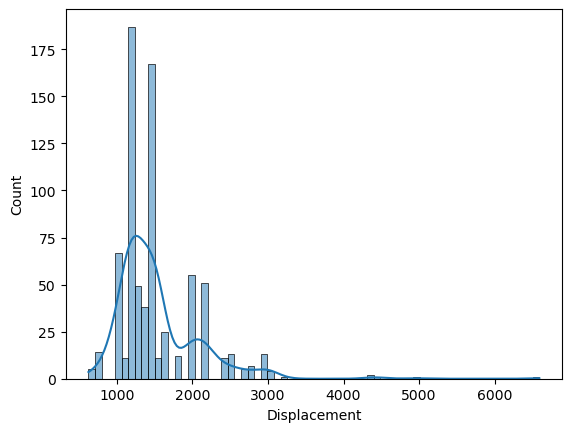

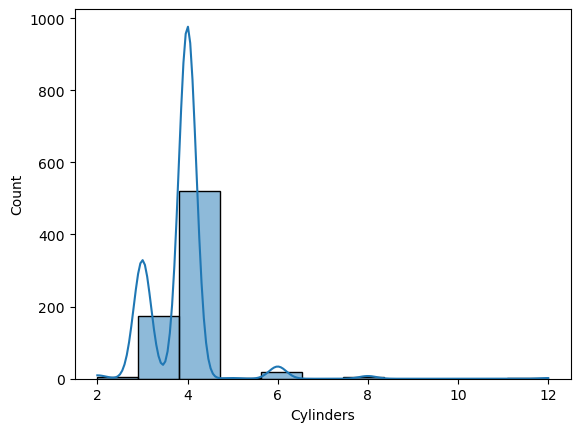

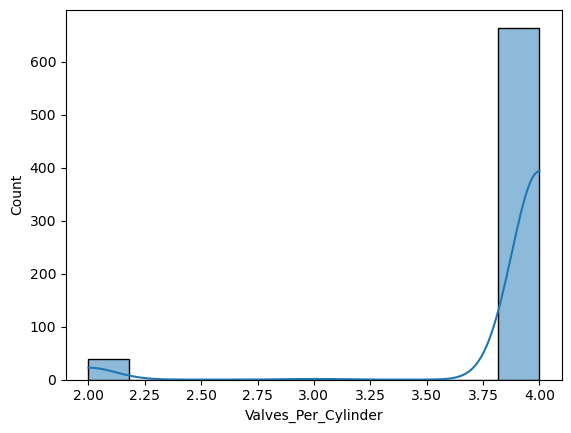

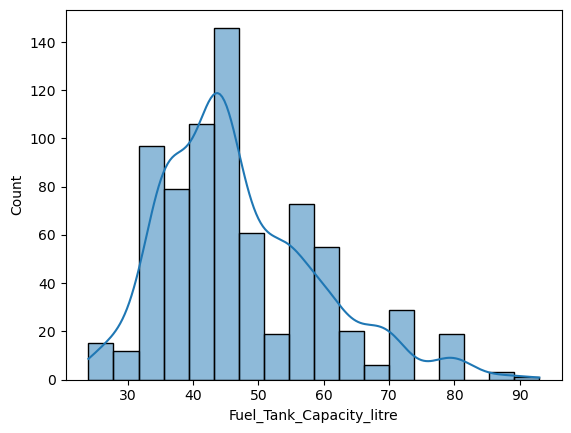

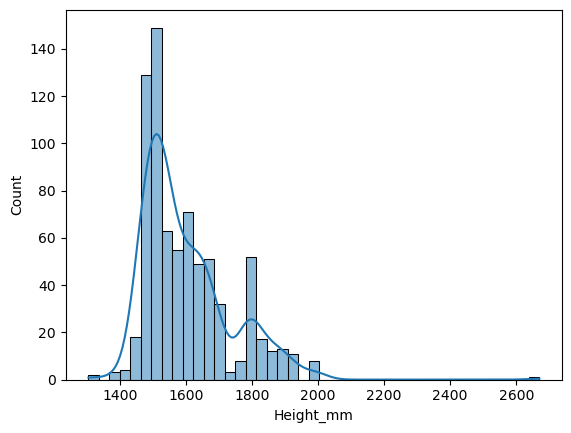

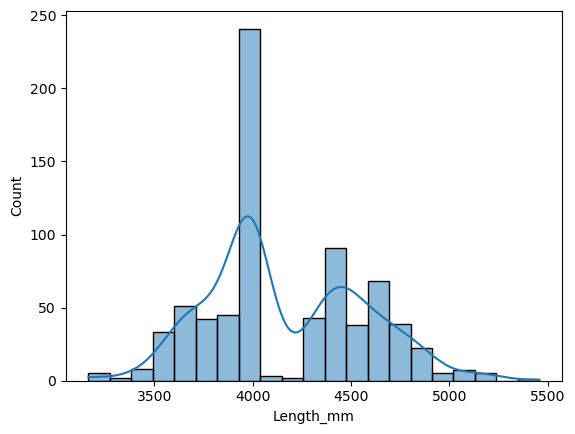

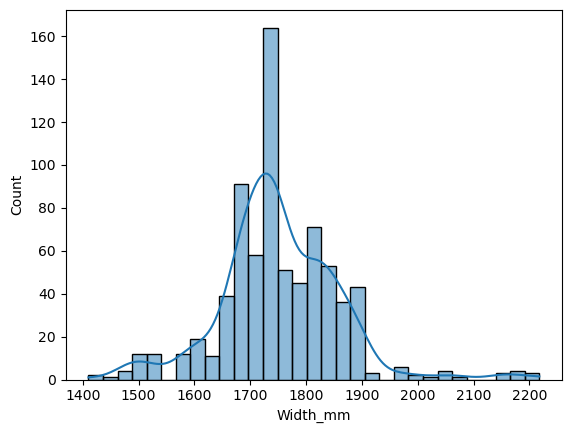

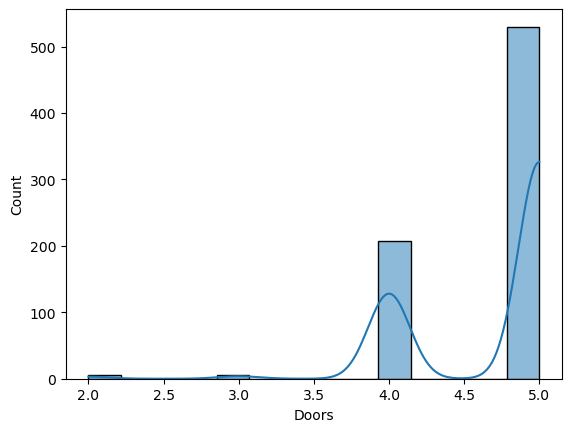

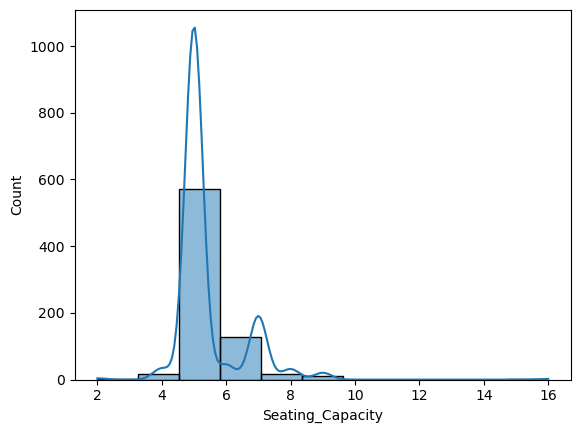

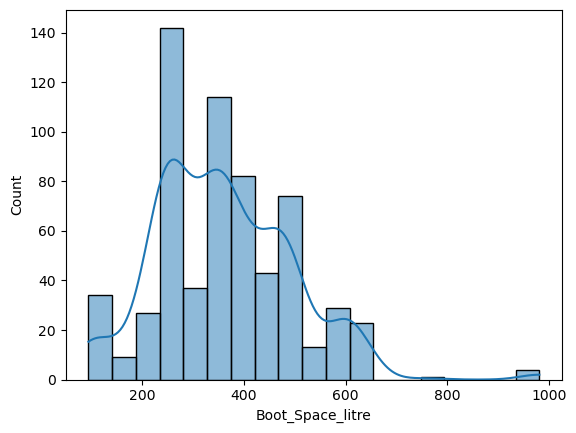

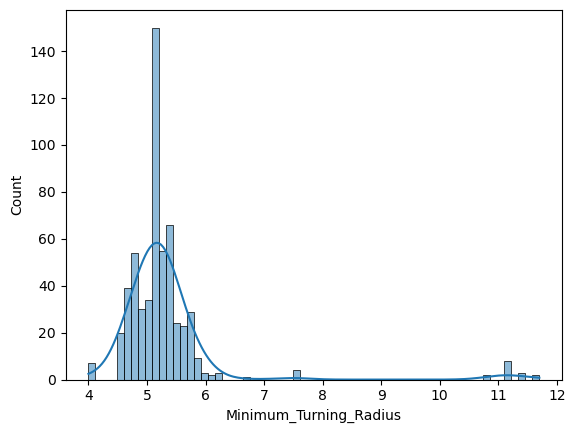

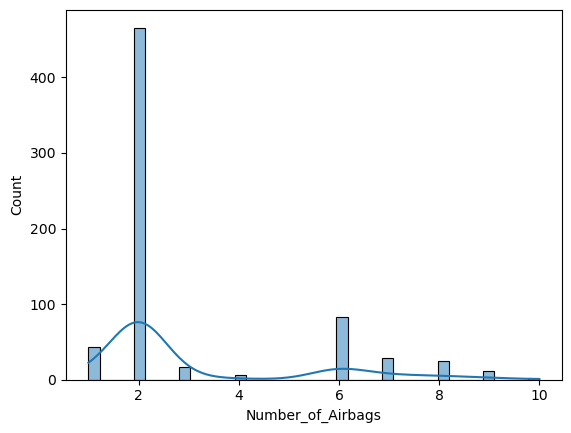

In [14]:
# create histgram and boxplot
for col in num_df.columns:
    cur = sns.histplot(num_df[col], kde=True)
    plt.show()

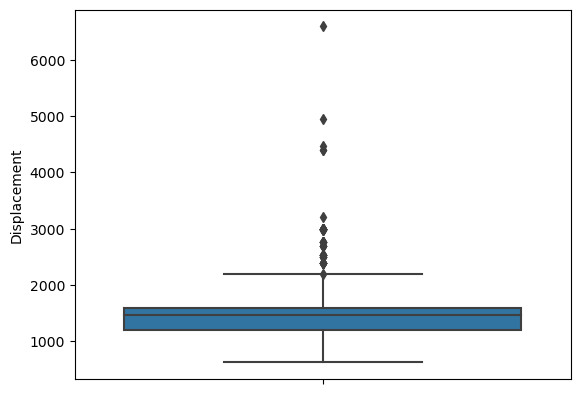

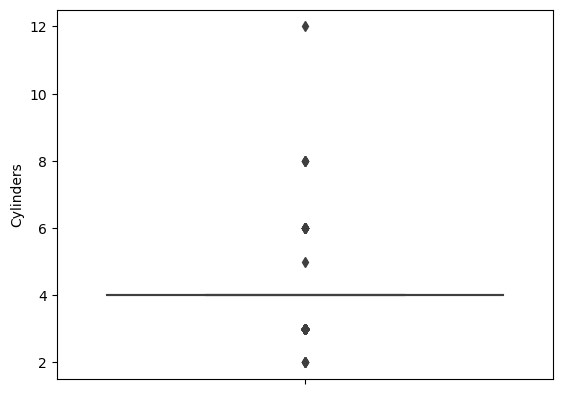

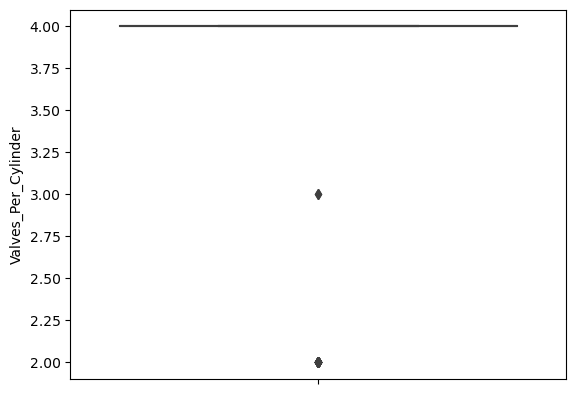

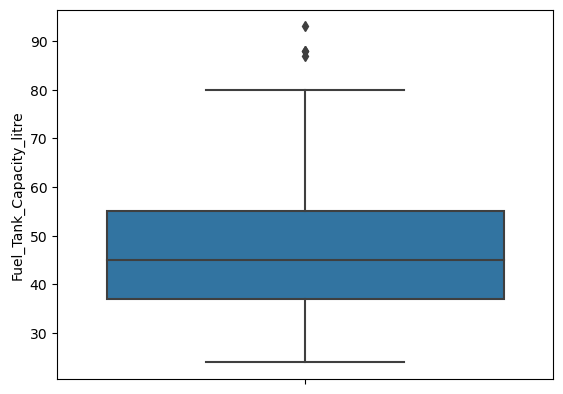

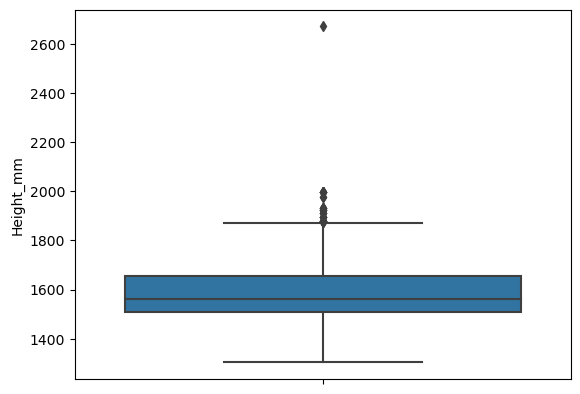

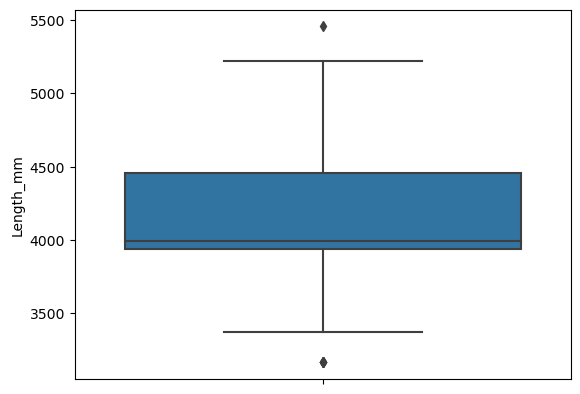

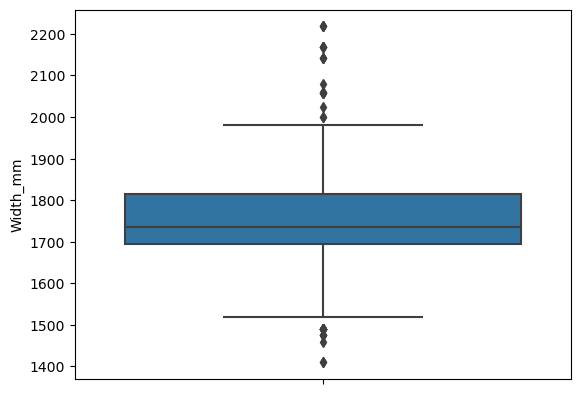

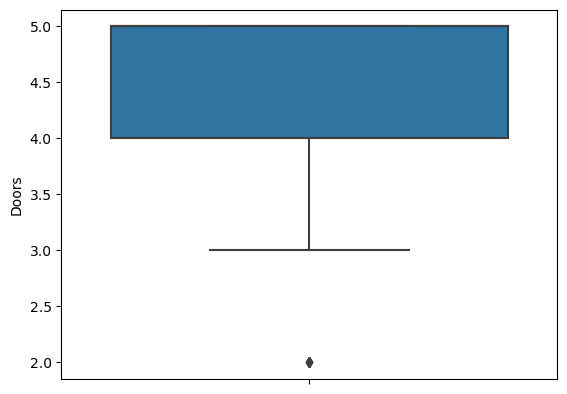

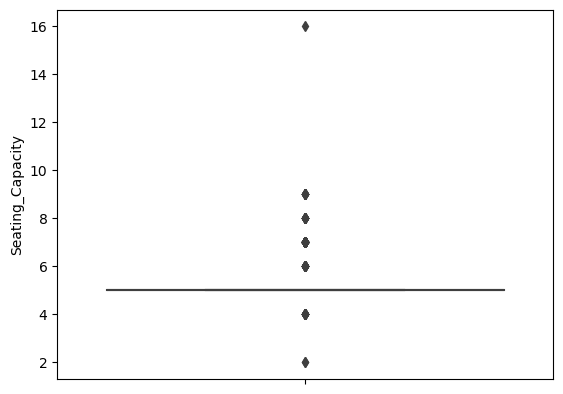

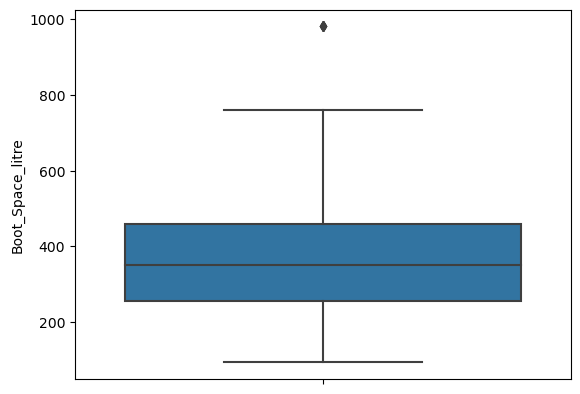

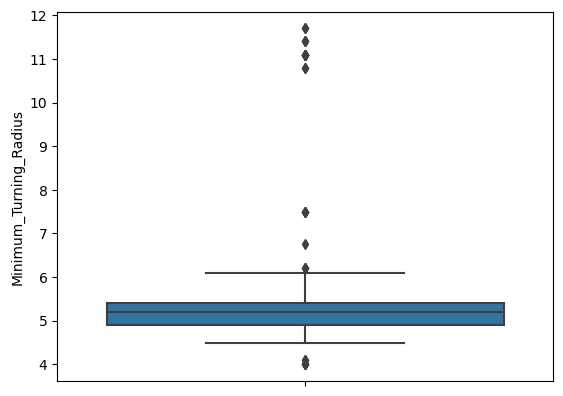

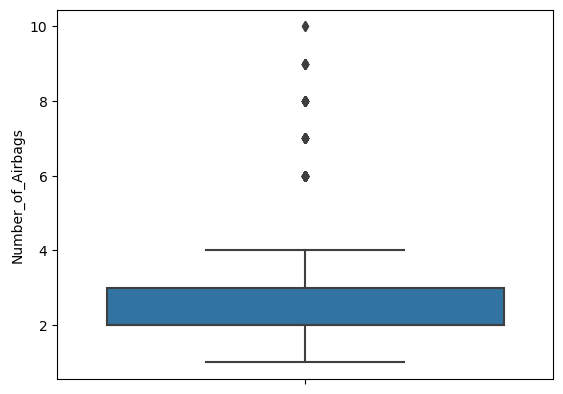

In [15]:
# create histgram and boxplot
for col in num_df.columns:
    cur = sns.boxplot(y=num_df[col])
    plt.show()

# Create the heatmap between numberical data

<Axes: >

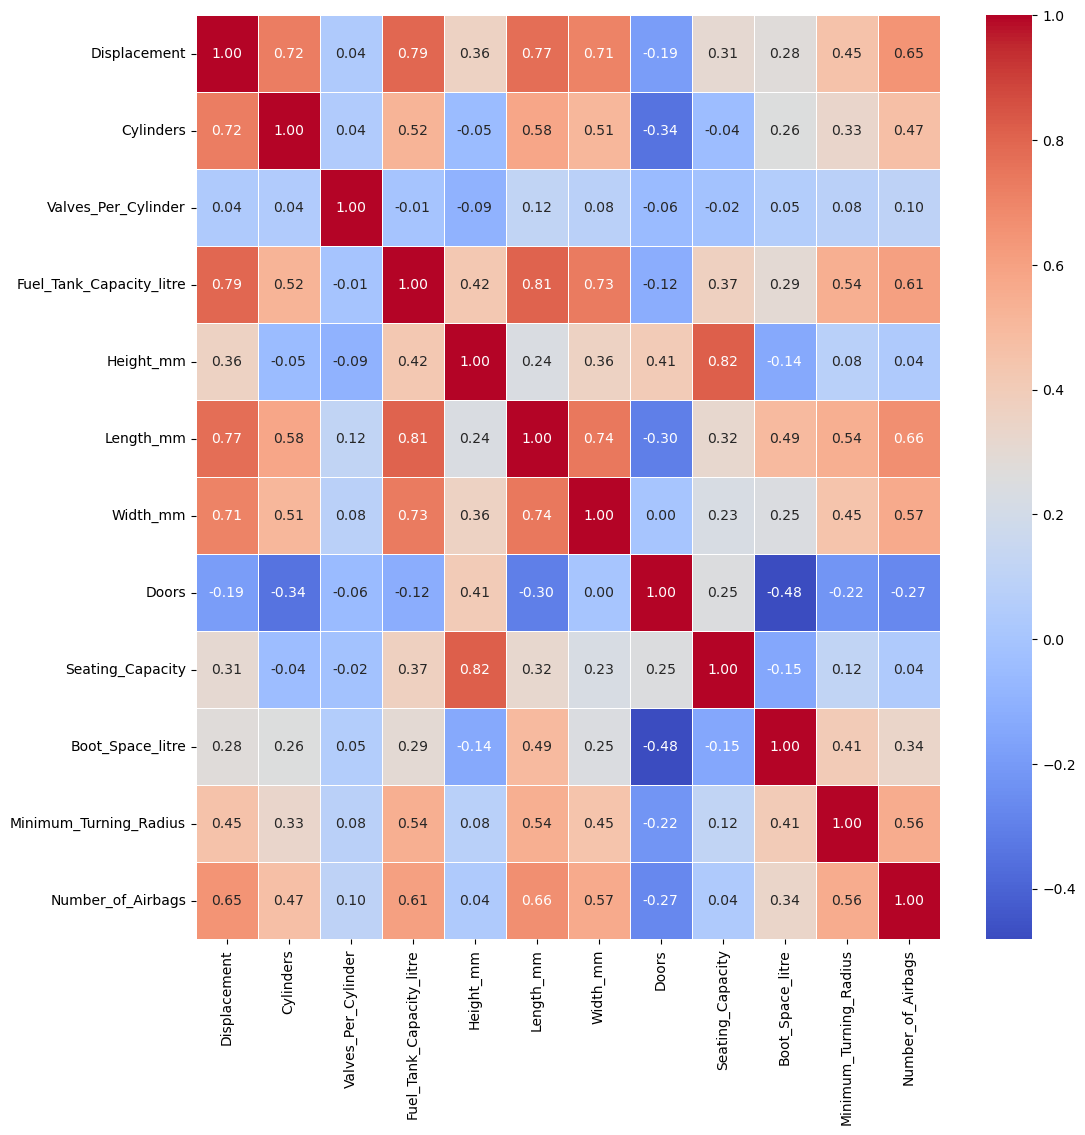

In [16]:
size = len(num_df.columns)
f,ax = plt.subplots(figsize=(size, size))
sns.heatmap(num_df.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax, cmap='coolwarm')

In [17]:
df['Body_Type'].value_counts()

Hatchback              248
SUV                    219
Sedan                  209
MUV                     31
MPV                     23
Crossover               10
Coupe                    3
Crossover, SUV           2
SUV, Crossover           2
Sports, Convertible      2
Sedan, Coupe             1
Name: Body_Type, dtype: int64

# Relationship between body type and Cylinders

In [18]:
cur_df = df[['Body_Type', 'Cylinders']]
cur_df

,Body_Type,Cylinders
Sl. No.,,
1,Hatchback,2.0
2,Hatchback,2.0
4,Hatchback,2.0
5,Hatchback,2.0
6,Hatchback,2.0
...,...,...
783,Sedan,4.0
784,Sedan,4.0
785,Sedan,4.0


In [19]:
# check non value in cyliners and body type
cur_df['Body_Type'].isna().value_counts()

False    750
True       1
Name: Body_Type, dtype: int64

In [20]:
cur_df['Cylinders'].isna().value_counts()

False    724
True      27
Name: Cylinders, dtype: int64

In [21]:
# We found that there are 41 rows are no values therefore, we just drop these value
cur_df = cur_df.dropna()

In [22]:
cur_df

,Body_Type,Cylinders
Sl. No.,,
1,Hatchback,2.0
2,Hatchback,2.0
4,Hatchback,2.0
5,Hatchback,2.0
6,Hatchback,2.0
...,...,...
783,Sedan,4.0
784,Sedan,4.0
785,Sedan,4.0


In [23]:
cur_df['Body_Type'].value_counts()

Hatchback              248
SUV                    208
Sedan                  193
MUV                     31
MPV                     23
Crossover               10
Coupe                    3
Crossover, SUV           2
SUV, Crossover           2
Sports, Convertible      2
Sedan, Coupe             1
Name: Body_Type, dtype: int64

In [24]:
# create a dict to store each type of body type, 
body_cyl_dic = defaultdict(list)
for row in cur_df.iterrows():
    b_type = row[1][0].split(', ')
    for item in b_type:
        body_cyl_dic[item].append(row[1][1])
final_b_c_dic = defaultdict(dict)
for key, value in body_cyl_dic.items():
    counter_item = Counter(value)
    cur_value_sum = sum(list(counter_item.values()))
    for key_in in counter_item.keys():
        final_b_c_dic[key][key_in] = round((counter_item[key_in] / cur_value_sum) * 100, 1)
final_b_c_dic

defaultdict(dict,
            {'Hatchback': {2.0: 2.0, 3.0: 47.2, 4.0: 50.8},
             'MPV': {4.0: 91.3, 3.0: 8.7},
             'MUV': {3.0: 12.9, 4.0: 87.1},
             'Sedan': {4.0: 88.1, 3.0: 6.2, 8.0: 1.0, 6.0: 4.1, 12.0: 0.5},
             'Crossover': {4.0: 64.3, 3.0: 35.7},
             'SUV': {4.0: 79.2, 6.0: 3.3, 3.0: 16.5, 5.0: 0.5, 8.0: 0.5},
             'Coupe': {8.0: 50.0, 6.0: 50.0},
             'Sports': {4.0: 50.0, 6.0: 50.0},
             'Convertible': {4.0: 50.0, 6.0: 50.0}})

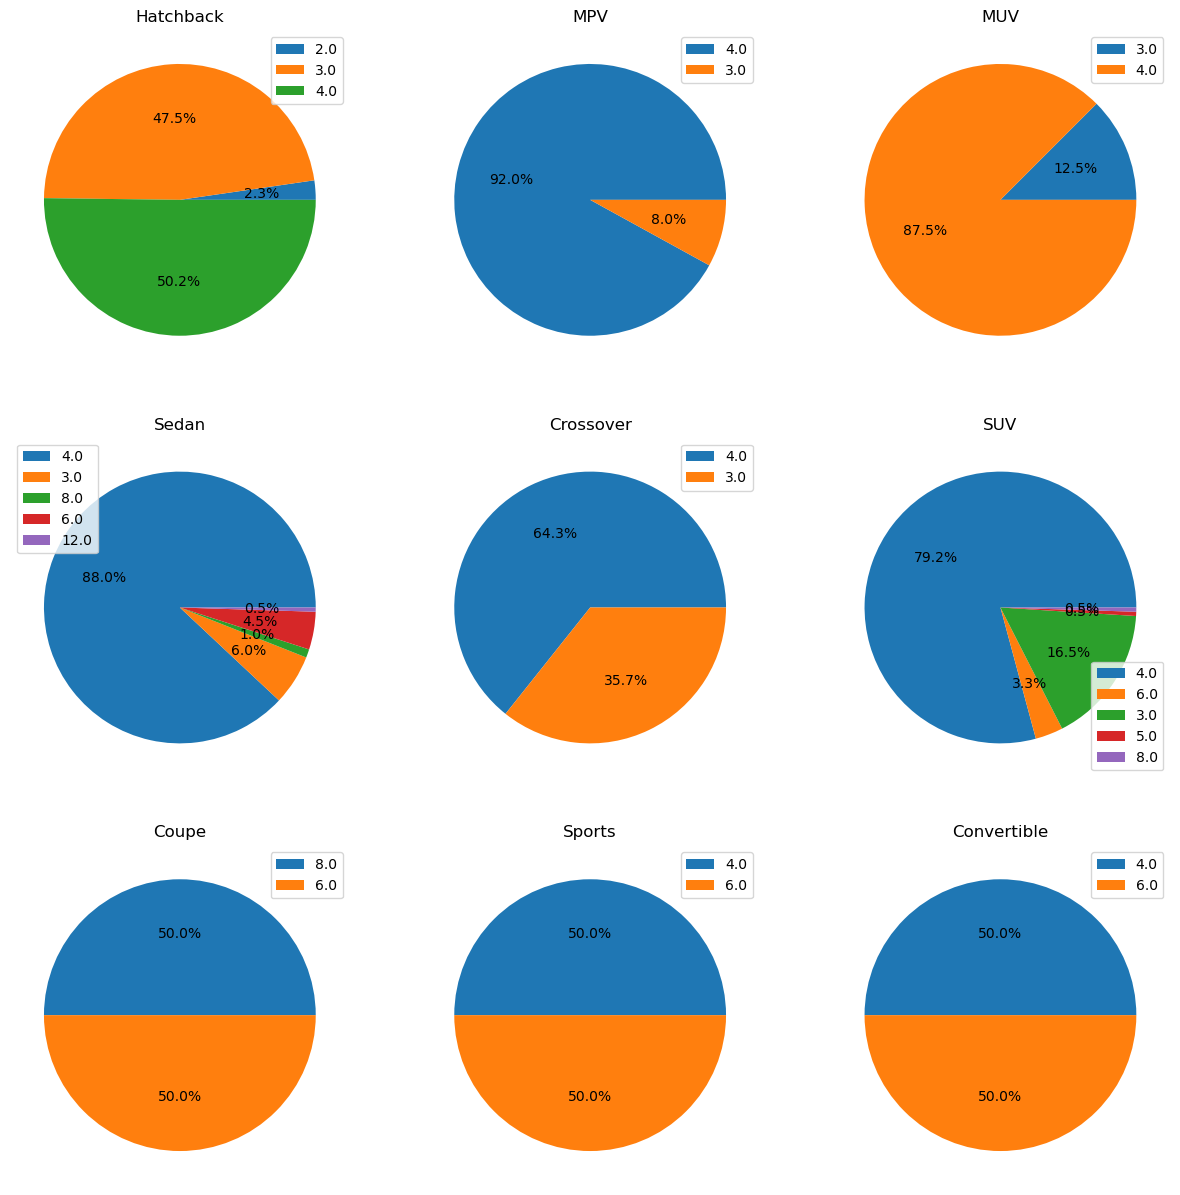

In [17]:
fig, axes = plt.subplots(figsize=(15,15), ncols=3, nrows=3)

row = 0
col = 0

for key, value in final_b_c_dic.items():
    axes[row][col].set_title(f'{key}')
    y = np.array(list(final_b_c_dic[key].values()))
    my_labels = list(final_b_c_dic[key].keys())
    axes[row][col].pie(y, autopct='%1.1f%%')
    axes[row][col].legend(my_labels)
    col += 1
    
    if col == 3:
        col = 0
        row += 1
    

# The relationship between the type of brake and model and cylinder

In [25]:
q2_df = df[['Make', 'Cylinders', 'Front_Brakes', 'Rear_Brakes']]
q2_df

,Make,Cylinders,Front_Brakes,Rear_Brakes
Sl. No.,,,,
1,Tata,2.0,Drum,Drum
2,Tata,2.0,Drum,Drum
4,Tata,2.0,Drum,Drum
5,Tata,2.0,Drum,Drum
6,Tata,2.0,Drum,Drum
...,...,...,...,...
783,Skoda,4.0,Ventilated Disc,Ventilated Disc
784,Skoda,4.0,Ventilated Disc,Ventilated Disc
785,Mahindra,4.0,Ventilated Disc,Drum


In [26]:
q2_df['Front_Brakes'].isna().value_counts()

False    747
True       4
Name: Front_Brakes, dtype: int64

In [27]:
q2_df['Rear_Brakes'].isna().value_counts()

False    747
True       4
Name: Rear_Brakes, dtype: int64

In [28]:
# We can know that there are several rows are no data
# Therefore, just dropping these rows
q2_df = q2_df.dropna()
q2_df

,Make,Cylinders,Front_Brakes,Rear_Brakes
Sl. No.,,,,
1,Tata,2.0,Drum,Drum
2,Tata,2.0,Drum,Drum
4,Tata,2.0,Drum,Drum
5,Tata,2.0,Drum,Drum
6,Tata,2.0,Drum,Drum
...,...,...,...,...
783,Skoda,4.0,Ventilated Disc,Ventilated Disc
784,Skoda,4.0,Ventilated Disc,Ventilated Disc
785,Mahindra,4.0,Ventilated Disc,Drum


In [29]:
# First, we check the make and brakes relationships
make_cylinder_dict = defaultdict(list)
for row in q2_df.iterrows():
    make_cylinder_dict[row[1]['Make']].append(row[1]['Cylinders'])

make_cylinder_dict_count = defaultdict(dict)
for key, value in make_cylinder_dict.items():
    counter = Counter(value)
    all_item = sum(list(counter.values()))
    for key_in in counter.keys():
        make_cylinder_dict_count[key][key_in] = round((counter[key_in] / all_item) * 100, 1)
    
make_cylinder_dict_count

defaultdict(dict,
            {'Tata': {2.0: 5.4, 3.0: 43.5, 4.0: 51.1},
             'Renault': {3.0: 44.4, 4.0: 55.6},
             'Suzuki': {4.0: 62.5, 3.0: 37.5},
             'Hyundai': {4.0: 92.5, 3.0: 7.5},
             'Toyota': {4.0: 98.8, 8.0: 1.2},
             'Volkswagen': {3.0: 20.7, 4.0: 79.3},
             'Ford': {4.0: 71.4, 3.0: 23.8, 8.0: 2.4, 5.0: 2.4},
             'Mahindra': {4.0: 63.5, 3.0: 36.5},
             'Skoda': {4.0: 100.0},
             'Bmw': {4.0: 41.7, 6.0: 50.0, 12.0: 2.8, 8.0: 5.6}})

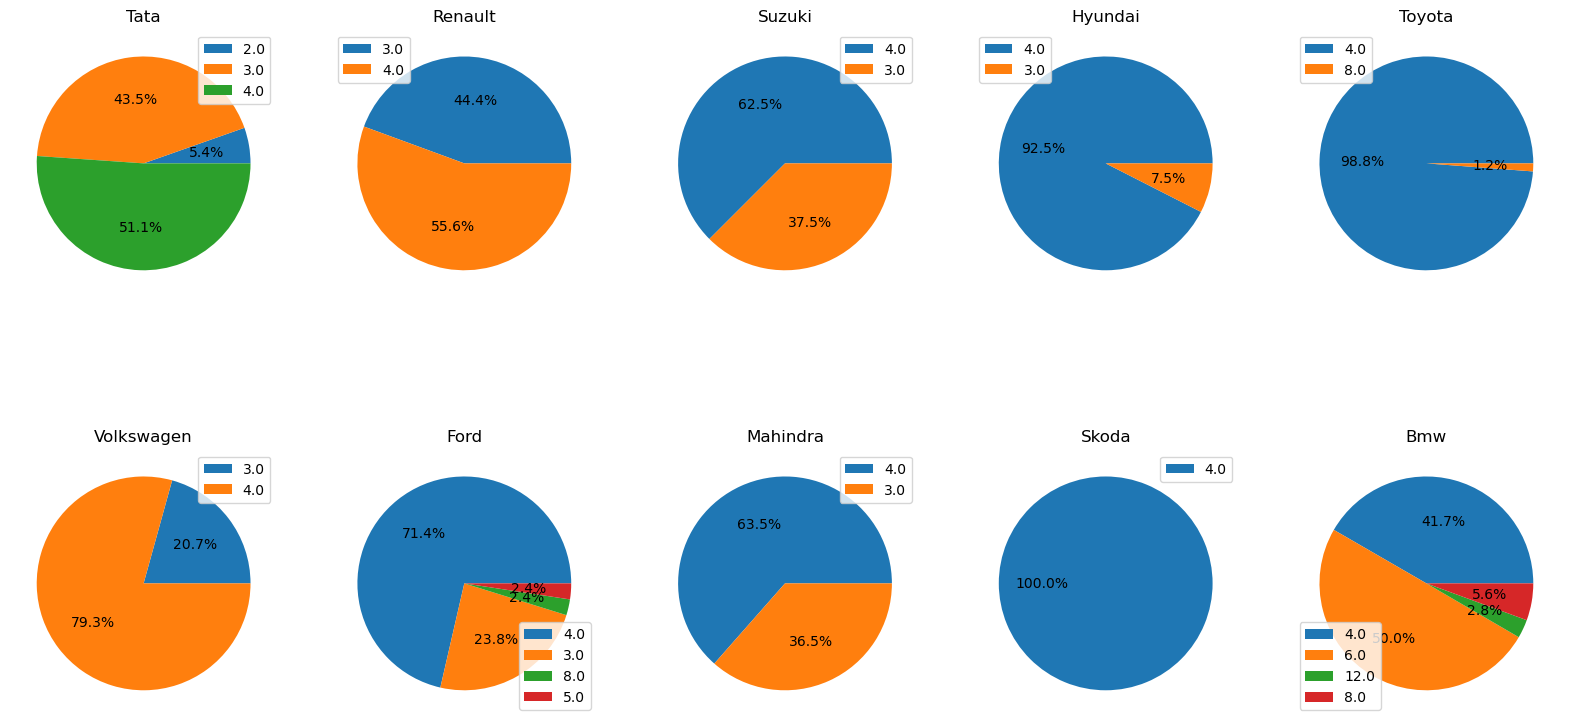

In [30]:
fig, axes = plt.subplots(figsize=(20,10), ncols=5, nrows=2)

row = 0
col = 0

for key, value in make_cylinder_dict_count.items():
    axes[row][col].set_title(f'{key}')
    y = np.array(list(make_cylinder_dict_count[key].values()))
    my_labels = list(make_cylinder_dict_count[key].keys())
    axes[row][col].pie(y, autopct='%1.1f%%')
    axes[row][col].legend(my_labels)
    col += 1
    
    if col == 5:
        col = 0
        row += 1

In [31]:
make_front_brakes = defaultdict(list)
for row in q2_df.iterrows():
    make_front_brakes[row[1]['Make']].append(row[1]['Front_Brakes'])

make_front_brakes_count = defaultdict(dict)
for key, value in make_front_brakes.items():
    counter = Counter(value)
    all_item = sum(list(counter.values()))
    for key_in in counter.keys():
        make_front_brakes_count[key][key_in] = round((counter[key_in] / all_item) * 100, 1)
    
make_front_brakes_count

defaultdict(dict,
            {'Tata': {'Drum': 5.4,
              'Ventilated Disc': 81.5,
              'Solid Disc': 13.0},
             'Renault': {'Ventilated Disc': 88.9, 'Solid Disc': 11.1},
             'Suzuki': {'Ventilated Disc': 92.1, 'Solid Disc': 7.9},
             'Hyundai': {'Solid Disc': 13.2, 'Ventilated Disc': 86.8},
             'Toyota': {'Ventilated Disc': 100.0},
             'Volkswagen': {'Ventilated Disc': 100.0},
             'Ford': {'Ventilated Disc': 100.0},
             'Mahindra': {'Solid Disc': 7.7, 'Ventilated Disc': 92.3},
             'Skoda': {'Ventilated Disc': 100.0},
             'Bmw': {'Ventilated Disc': 97.2, 'Solid Disc': 2.8}})

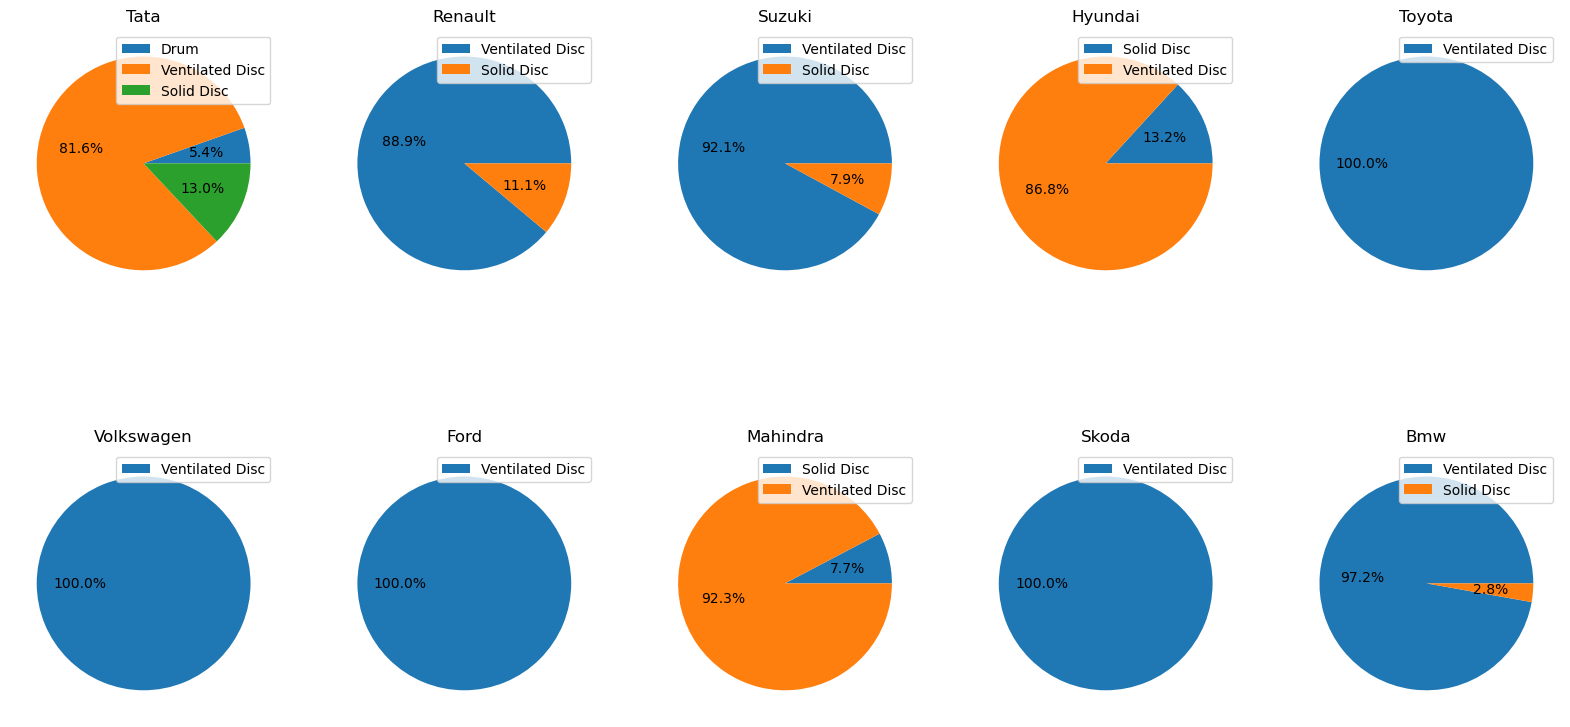

In [32]:
fig, axes = plt.subplots(figsize=(20,10), ncols=5, nrows=2)

row = 0
col = 0

for key, value in make_front_brakes_count.items():
    axes[row][col].set_title(f'{key}')
    y = np.array(list(make_front_brakes_count[key].values()))
    my_labels = list(make_front_brakes_count[key].keys())
    axes[row][col].pie(y, autopct='%1.1f%%')
    axes[row][col].legend(my_labels, loc=1)
    col += 1
    
    if col == 5:
        col = 0
        row += 1

In [33]:
make_rear_brakes = defaultdict(list)
for row in q2_df.iterrows():
    make_rear_brakes[row[1]['Make']].append(row[1]['Rear_Brakes'])

make_rear_brakes_count = defaultdict(dict)
for key, value in make_rear_brakes.items():
    counter = Counter(value)
    all_item = sum(list(counter.values()))
    for key_in in counter.keys():
        make_rear_brakes_count[key][key_in] = round((counter[key_in] / all_item) * 100, 1)
    
make_rear_brakes_count

defaultdict(dict,
            {'Tata': {'Drum': 90.2, 'Ventilated Disc': 9.8},
             'Renault': {'Drum': 100.0},
             'Suzuki': {'Drum': 98.0,
              'Ventilated Disc': 0.7,
              'Solid Disc': 1.3},
             'Hyundai': {'Drum': 88.7,
              'Ventilated Disc': 4.7,
              'Solid Disc': 6.6},
             'Toyota': {'Drum': 73.8,
              'Ventilated Disc': 18.8,
              'Solid Disc': 7.5},
             'Volkswagen': {'Drum': 79.3,
              'Solid Disc': 6.9,
              'Ventilated Disc': 13.8},
             'Ford': {'Drum': 90.5, 'Ventilated Disc': 9.5},
             'Mahindra': {'Drum': 69.2,
              'Ventilated Disc': 28.8,
              'Solid Disc': 1.9},
             'Skoda': {'Ventilated Disc': 58.1, 'Drum': 41.9},
             'Bmw': {'Ventilated Disc': 100.0}})

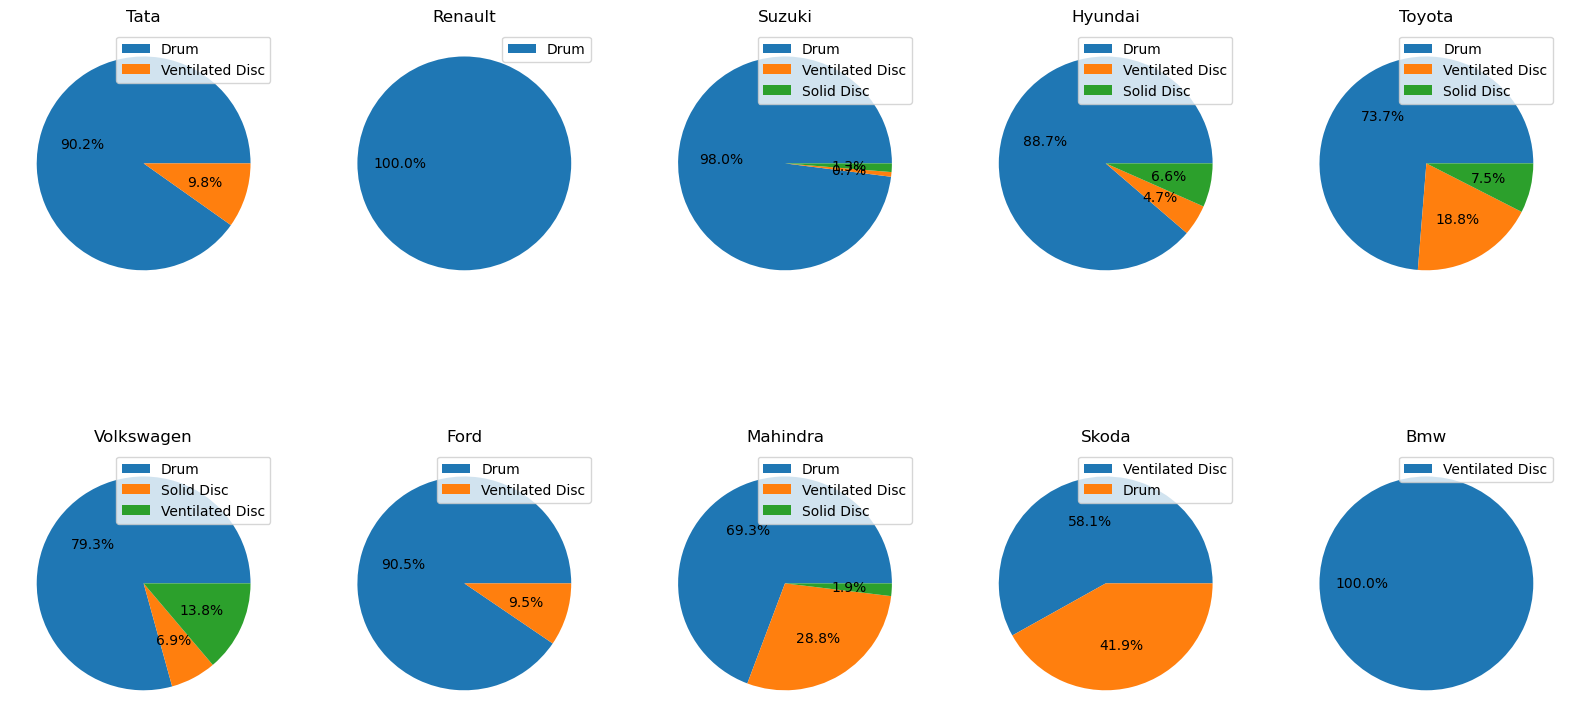

In [34]:
fig, axes = plt.subplots(figsize=(20,10), ncols=5, nrows=2)

row = 0
col = 0

for key, value in make_rear_brakes_count.items():
    axes[row][col].set_title(f'{key}')
    y = np.array(list(make_rear_brakes_count[key].values()))
    my_labels = list(make_rear_brakes_count[key].keys())
    axes[row][col].pie(y, autopct='%1.1f%%')
    axes[row][col].legend(my_labels, loc=1)
    col += 1
    
    if col == 5:
        col = 0
        row += 1

In [35]:
# Combination of front_brake and rear brake
make_front_rear_brakes = defaultdict(list)
for row in q2_df.iterrows():
    rear = row[1]['Rear_Brakes']
    front = row[1]['Front_Brakes']

    front_end = front + ' + ' + rear
    make_front_rear_brakes[row[1]['Make']].append(front_end)

make_front_rear_brakes_count = defaultdict(dict)
for key, value in make_front_rear_brakes.items():
    counter = Counter(value)
    all_item = sum(list(counter.values()))
    for key_in in counter.keys():
        make_front_rear_brakes_count[key][key_in] = round((counter[key_in] / all_item) * 100, 1)
    
make_front_rear_brakes_count

defaultdict(dict,
            {'Tata': {'Drum + Drum': 5.4,
              'Ventilated Disc + Drum': 71.7,
              'Solid Disc + Drum': 13.0,
              'Ventilated Disc + Ventilated Disc': 9.8},
             'Renault': {'Ventilated Disc + Drum': 88.9,
              'Solid Disc + Drum': 11.1},
             'Suzuki': {'Ventilated Disc + Drum': 90.1,
              'Solid Disc + Drum': 7.9,
              'Ventilated Disc + Ventilated Disc': 0.7,
              'Ventilated Disc + Solid Disc': 1.3},
             'Hyundai': {'Solid Disc + Drum': 13.2,
              'Ventilated Disc + Drum': 75.5,
              'Ventilated Disc + Ventilated Disc': 4.7,
              'Ventilated Disc + Solid Disc': 6.6},
             'Toyota': {'Ventilated Disc + Drum': 73.8,
              'Ventilated Disc + Ventilated Disc': 18.8,
              'Ventilated Disc + Solid Disc': 7.5},
             'Volkswagen': {'Ventilated Disc + Drum': 79.3,
              'Ventilated Disc + Solid Disc': 6.9,
           

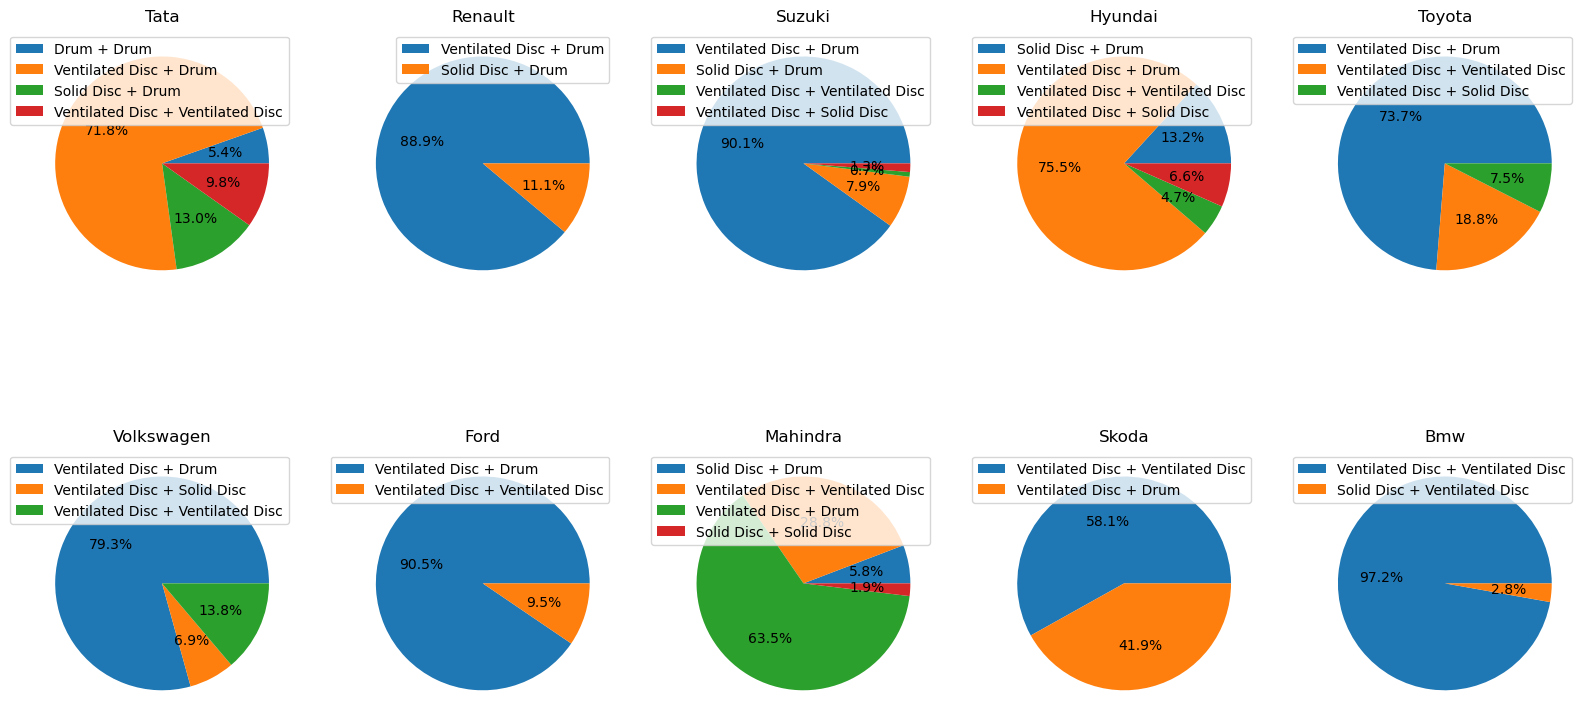

In [36]:
fig, axes = plt.subplots(figsize=(20,10), ncols=5, nrows=2)

row = 0
col = 0

for key, value in make_front_rear_brakes_count.items():
    axes[row][col].set_title(f'{key}')
    y = np.array(list(make_front_rear_brakes_count[key].values()))
    my_labels = list(make_front_rear_brakes_count[key].keys())
    axes[row][col].pie(y, autopct='%1.1f%%')
    axes[row][col].legend(my_labels, loc=1)
    col += 1
    
    if col == 5:
        col = 0
        row += 1

In [37]:
# Combination of front_brake and rear brake
cylinder_front_rear_brakes = defaultdict(list)
for row in q2_df.iterrows():
    rear = row[1]['Rear_Brakes']
    front = row[1]['Front_Brakes']

    front_end = front + ' + ' + rear
    cylinder_front_rear_brakes[row[1]['Cylinders']].append(front_end)

cylinder_front_rear_brakes_count = defaultdict(dict)
for key, value in cylinder_front_rear_brakes.items():
    counter = Counter(value)
    all_item = sum(list(counter.values()))
    for key_in in counter.keys():
        cylinder_front_rear_brakes_count[key][key_in] = round((counter[key_in] / all_item) * 100, 1)
    
cylinder_front_rear_brakes_count

defaultdict(dict,
            {2.0: {'Drum + Drum': 100.0},
             3.0: {'Ventilated Disc + Drum': 90.9,
              'Solid Disc + Drum': 8.6,
              'Ventilated Disc + Ventilated Disc': 0.6},
             4.0: {'Ventilated Disc + Drum': 69.8,
              'Solid Disc + Drum': 6.4,
              'Ventilated Disc + Ventilated Disc': 20.2,
              'Ventilated Disc + Solid Disc': 3.3,
              'Solid Disc + Solid Disc': 0.4},
             6.0: {'Ventilated Disc + Ventilated Disc': 94.4,
              'Solid Disc + Ventilated Disc': 5.6},
             8.0: {'Ventilated Disc + Ventilated Disc': 100.0},
             12.0: {'Ventilated Disc + Ventilated Disc': 100.0},
             5.0: {'Ventilated Disc + Ventilated Disc': 100.0}})

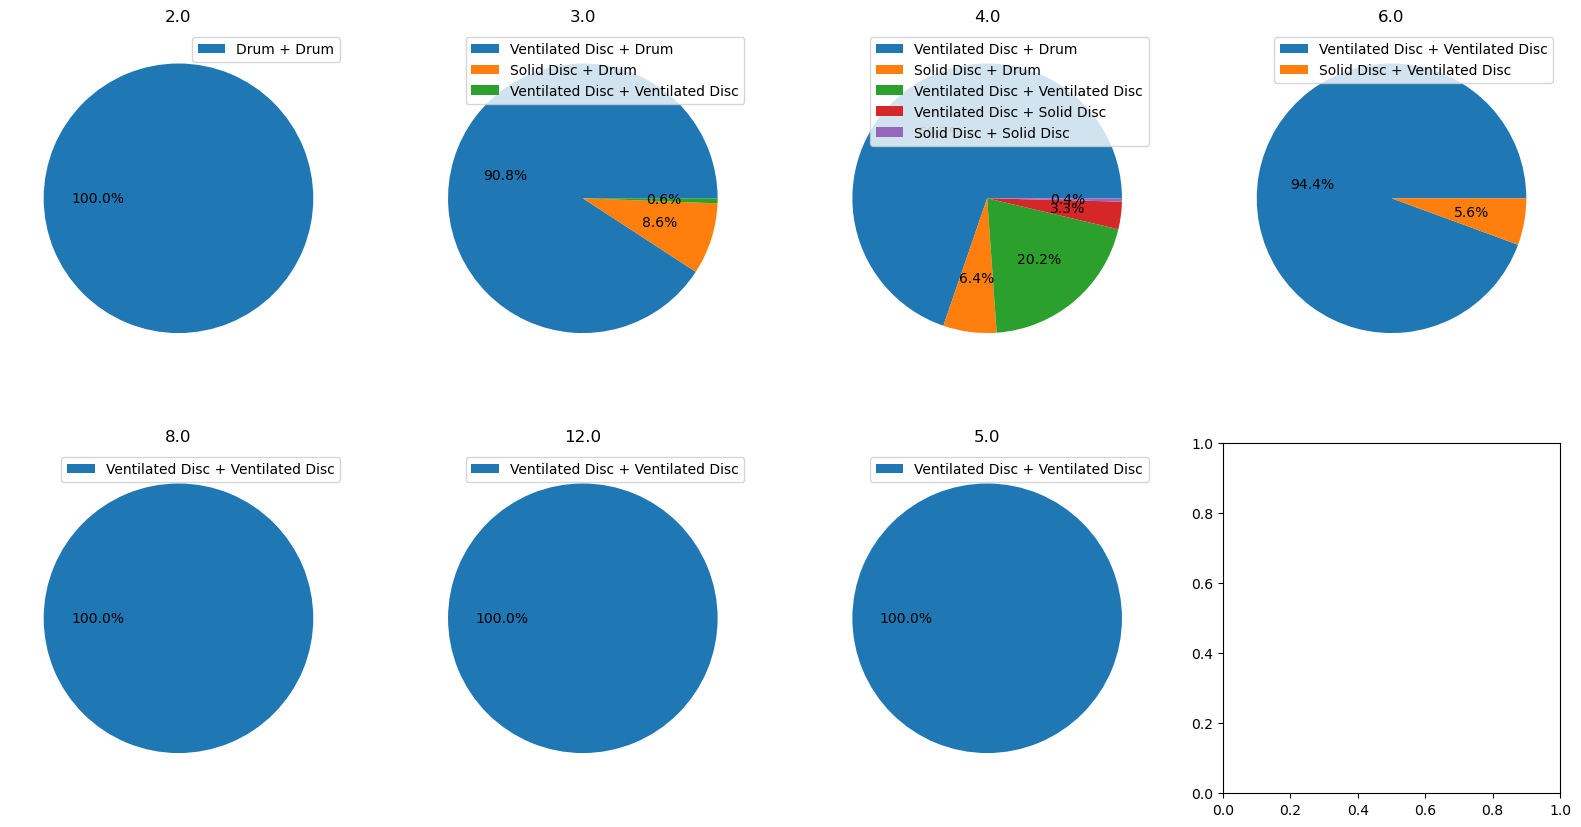

In [38]:
fig, axes = plt.subplots(figsize=(20,10), ncols=4, nrows=2)

row = 0
col = 0

for key, value in cylinder_front_rear_brakes_count.items():
    axes[row][col].set_title(f'{key}')
    y = np.array(list(cylinder_front_rear_brakes_count[key].values()))
    my_labels = list(cylinder_front_rear_brakes_count[key].keys())
    axes[row][col].pie(y, autopct='%1.1f%%')
    axes[row][col].legend(my_labels, loc=1)
    col += 1
    
    if col == 4:
        col = 0
        row += 1

From the above analysis, we can know that for there is no relationship between the type of brake and the number of cylinders.

Besides, For the Front Brake, the Ventilated Disc brakes are used the most. 

For the Rear Brake, the Drum brakes are used the most, except for the BMW.

For the combination of Front Brake and the Rear Brake, the most common combination is Ventilate Disc Brake as the front brake and the Drum brakes for the Rear Brake.

The combination of using ventilate disc brake as both front brake and rear brake also exists a lot.


# The relationship between the number of cylinders and City Mileage km litre

In [39]:
q3_df = df[['Cylinders', 'City_Mileage_km_litre']]
q3_df

KeyError: "['City_Mileage_km_litre'] not in index"

In [35]:
q3_df.isna().value_counts()

Cylinders  City_Mileage_km_litre
False      False                    447
           True                     300
True       True                      29
           False                     11
dtype: int64

In [36]:
q3_df = q3_df.dropna()

In [37]:
q3_df

,Cylinders,City_Mileage_km_litre
Sl. No.,,
1,2.0,23.6
2,2.0,23.6
4,2.0,23.6
5,2.0,23.6
6,2.0,23.6
...,...,...
754,3.0,12.8
755,3.0,12.8
785,4.0,18.0


In [20]:
grouop_by_df = q3_df.groupby('Cylinders').mean()
grouop_by_df

NameError: name 'q3_df' is not defined

In [21]:
ax = sns.barplot(data=grouop_by_df, x=grouop_by_df.index, y=grouop_by_df['City_Mileage_km_litre'])
ax.set(title='Relationship between the number of cylinders and city mileage fuel consumption')
ax.bar_label(ax.containers[0])

NameError: name 'grouop_by_df' is not defined